In [16]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from vis_utils import load_volume, visualize_volume

from scipy.ndimage import gaussian_gradient_magnitude

import SimpleITK as sitk

%env SITK_SHOW_COMMAND /home/mateusz/Downloads/Fiji.app/ImageJ-linux64

env: SITK_SHOW_COMMAND=/home/mateusz/Downloads/Fiji.app/ImageJ-linux64


In [2]:
source_dir = './data/'
files = glob.glob(source_dir + '/*/*.raw')
sample_file = files[12]
sample_file

'./data/P01/P01_60um_1612x623x1108.raw'

In [3]:
%%time
volume = load_volume(sample_file, scale=0.5)
print(volume.shape)

(554, 312, 806)
CPU times: user 1.86 s, sys: 512 ms, total: 2.37 s
Wall time: 2.37 s


In [5]:
visualize_volume(volume)

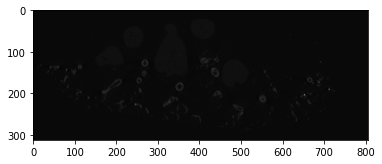

In [6]:
v_slice = volume[230, :, :]
plt.imshow(v_slice, cmap='gray')

0.0016314017619115607


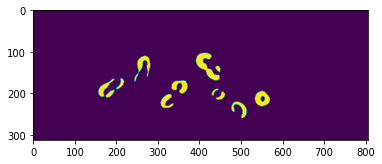

In [7]:
slice_gradient = gaussian_gradient_magnitude(v_slice / 255, sigma=10)
print(slice_gradient.max())
plt.imshow(slice_gradient > 0.0010)

In [28]:
%%time
thick_slice = volume[200:400, :, :]
tsg = gaussian_gradient_magnitude(thick_slice/255, sigma=5)
tsg = tsg / tsg.max() * 200
tsg = tsg.astype(np.uint8)
tsg.min(), tsg.max()

CPU times: user 11.5 s, sys: 581 ms, total: 12 s
Wall time: 12 s


(0, 200)

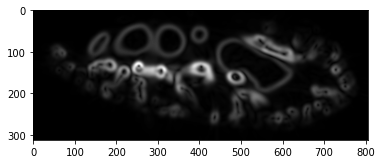

In [30]:
plt.imshow(tsg[100], cmap='gray')

In [32]:
visualize_volume(volume, scale=0.5)